# Support vector Machines

`Support Vector Machines (SVM)` is a `supervised machine learning algorithm` which can be used for both classification or regression challenges.

However, it is mostly used in classification problems.

In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well .

Types of SVM kernels:

1. Linear Kernel
2. Polynomial Kernel
3. Radial Basis Function Kernel (RBF)


## **SVC Support Vector Classification**  

In [1]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ml libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
# import the data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [4]:
# lets make X and y in our data
X = df.drop('species', axis=1)
y = df['species']

In [5]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [6]:

# call the model
model = SVC(kernel='rbf')
# train the model
model.fit(X_train, y_train)
# predict the model
y_pred = model.predict(X_test)

In [7]:

# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



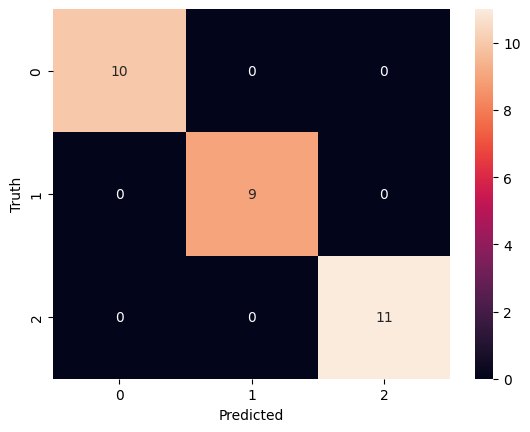

In [8]:
# draw the confusion matrix using heatmap

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
# label the plot
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()




## **SVR Support Vector Regression**

Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin).

In [9]:
from sklearn.svm import SVR

In [10]:
df = sns.load_dataset('tips')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
X = df[['total_bill']]
y = df['tip']

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [16]:
model = SVR()

model.fit(X_train,y_train)

SVR()

In [25]:
y_pred = model.predict(X_test)

In [36]:
model.predict([[15]])

c:\Users\Hamad\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([2.42243597])

In [29]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score


print('MAE :' , mean_absolute_error(y_test,y_pred))
print('MSE :' , mean_squared_error(y_test,y_pred))
print('R2 score :' , r2_score(y_test,y_pred))
print('RMSE :' , np.sqrt(mean_absolute_error(y_test,y_pred)))

MAE : 0.6103213357544105
MSE : 0.6093020747958432
R2 score : 0.5125471659009395
RMSE : 0.7812306546433073
